## Final prediction

In [22]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [23]:
def flow (x_path,y_path):
    #read
    x_test=pd.read_csv(x_path)
    y_test=pd.read_csv(y_path)
    y_test=y_test.replace({'Negative':0,'Positive':1,'Irrelevant':2,'Neutral':3})
    
    #encoder
    x_encode=encoder.transform(x_test)
    x_test_encode=pd.DataFrame(x_encode,columns=x_test.columns)

    # predcit
    y_pred=pd.DataFrame(model.predict(x_test_encode))
    y_pred=y_pred.replace({'Negative':0,'Positive':1,'Irrelevant':2,'Neutral':3})
    # metrics
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    return ypred,MSE,RMSE,MAE

In [24]:
    x_test=pd.read_csv('Data/Test/Evaluate/x_test.csv')
    y_test=pd.read_csv('Data/Test/Evaluate/y_test.csv')
    y_test=y_test.replace({'Negative':0,'Positive':1,'Irrelevant':2,'Neutral':3})

## Prediction

In [25]:
encode_model=jb.load('Data/Train/Model/x_train_encode_model.pkl')
model=jb.load('Data/Train/model/rf.pkl')


In [26]:
x_test

,id,company,tweet
0,10933,TomClancysGhostRecon,@GhostRecon #GhostReconBreakpoint just took do...
1,10256,PlayerUnknownsBattlegrounds(PUBG),@PTAofficialpk why u wanted to ban pubg is the...
2,1725,CallOfDutyBlackopsColdWar,I like the killstreaks
3,1967,CallOfDutyBlackopsColdWar,The recent Warzone and Modern Warfare patch ha...
4,6164,FIFA,In L6 mi remember when the two man dem did a f...
...,...,...,...
206,12480,WorldOfCraft,zysola.blogspot.com/p/welcome.html… #zysola #t...
207,8998,Nvidia,This is really interesting for indie RPGs with...
208,9114,Nvidia,@nvidia🤔 why? But why? We buy 2 cards convinc...
209,4276,CS-GO,Aiiight 💪


In [27]:
y_test

,feelings
0,0
1,3
2,1
3,0
4,2
...,...
206,3
207,2
208,3
209,3


In [29]:
y_pred=pd.DataFrame(model.predict(x_test_encode))
y_pred

,0
0,1.95
1,1.66
2,1.73
3,2.17
4,1.09
...,...
206,1.89
207,2.10
208,0.40
209,0.84


In [30]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
print(f'MSE= {MSE}\nRMSE = {RMSE}\nMAE = {MAE}')

MSE= 1.5536194312796208
RMSE = 1.2464427107892366
MAE = 1.1047867298578198


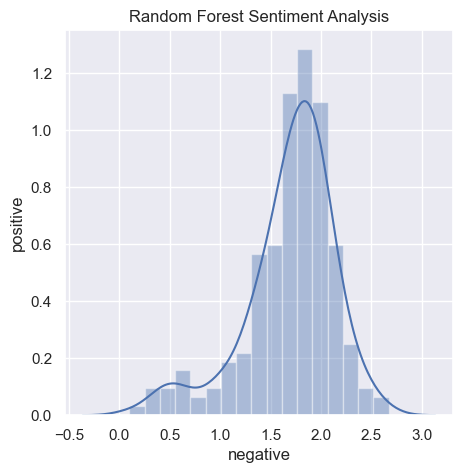

In [31]:
plt.figure(figsize=(5, 5))
sns.distplot(y_pred)
plt.xlabel('negative')
plt.ylabel('positive')
plt.title('Random Forest Sentiment Analysis')
plt.show()